In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

$$\mathcal{L_{\mathrm{linear}}} \propto \int_{N_{\mathrm{init}}}^{N_{\mathrm{UL}}} \mathrm{d}N' \exp \left( -\frac{1}{2} \frac{(N'-\overline{N})^2}{(N_{\mathrm{UL}}/3)^2} \right)$$

In [2]:
def lg_pdf_linear(N, N_bar, N_UL):
    
    return -.5*((N-N_bar)**2/(N_UL/3)**2)

In [3]:
def ll_linear(N_bar, N_UL, N_init=0):

    N_range = np.linspace(N_init, N_UL, 20000)

    ll = np.log(integrate.simpson(x=N_range, y=np.exp(lg_pdf_linear(N_range, N_bar, N_UL))))
    
    return ll

In [18]:
logN_UL = 12.0
N_UL = 10**logN_UL

logN_bar_range = np.linspace(10, 15, 200)
N_bar_range = 10**logN_bar_range

In [19]:
ll_lin_arr_0 = np.array([ll_linear(N_bar, N_UL, N_init=0) for N_bar in N_bar_range])
ll_lin_arr = np.array([ll_linear(N_bar, N_UL, N_init=-N_UL) for N_bar in N_bar_range])

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_29867/3222278024.py:5: RuntimeWarning: divide by zero encountered in log
  ll = np.log(integrate.simpson(x=N_range, y=np.exp(lg_pdf_linear(N_range, N_bar, N_UL))))


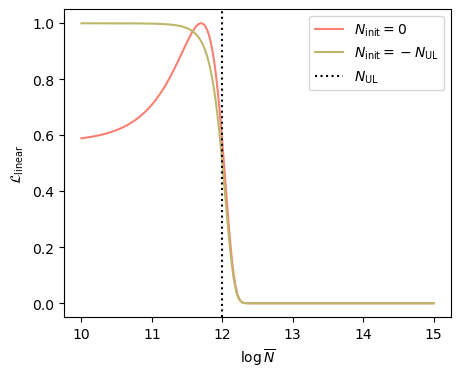

In [20]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(logN_bar_range, np.exp(ll_lin_arr_0)/np.max(np.exp(ll_lin_arr_0)), 
        color='salmon',label=r'$N_{\mathrm{init}}=0$')
ax.plot(logN_bar_range, np.exp(ll_lin_arr)/np.max(np.exp(ll_lin_arr)), 
        color='darkkhaki',label=r'$N_{\mathrm{init}}=-N_{\mathrm{UL}}$')

plt.axvline(logN_UL, color='black', linestyle=':', label=r'$N_{\mathrm{UL}}$')
plt.xlabel(r'$\log \overline{N}$')
plt.ylabel(r'$\mathcal{L}_{\mathrm{linear}}$')
plt.legend()

$$\mathcal{L}_{\mathrm{log}} \propto \int_{-\infty}^{\log N_{\mathrm{UL}}} \mathrm{d} \log N' \exp \left( -\frac{1}{2} \frac{(\log N'-\log \overline{N})^2}{\sigma^{2}}  \right)$$

$$ \sigma = \mathrm{d}\log N_{\mathrm{UL}} = \frac{1}{\ln 10} \frac{\mathrm{d}N_{\mathrm{UL}}}{N_{\mathrm{UL}}} = \frac{1}{3 \ln 10}$$

In [21]:
def ll_log(logN_bar, logN_UL, sig_y=1/(3*np.log(10))):
    
    y = logN_UL
    y_bar = logN_bar

    # Define an integration range for the reported value, from "-inf" to upper limit
    # Use a step size of 0.1 dex
    y_range_min = -10
    y_range_step = 0.05

    y_range = np.arange(y_range_min, y+y_range_step, y_range_step)

    # Confusing notation :(
    # CDF - marginalize over the reported value
    # Use 10^y_bar, not y_bar! Comparison for upper limits takes place in the linear scale
    ll = np.log(integrate.simpson(x=y_range, y=np.exp(-.5*(y_range-y_bar)**2/sig_y**2)))
    
    return ll 

In [22]:
ll_log_arr = np.array([ll_log(logN_bar, logN_UL) for logN_bar in logN_bar_range])

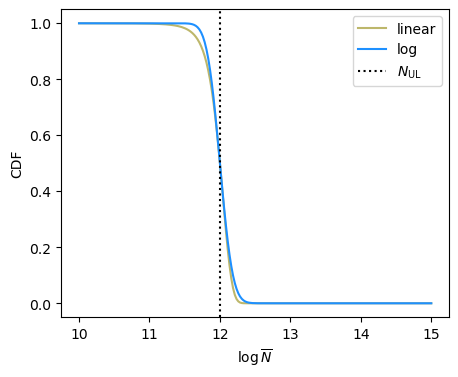

In [23]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(logN_bar_range, np.exp(ll_lin_arr)/np.max(np.exp(ll_lin_arr)), 
        color='darkkhaki',label='linear')
ax.plot(logN_bar_range, np.exp(ll_log_arr)/np.max(np.exp(ll_log_arr)), 
        color='dodgerblue',label='log')


plt.axvline(logN_UL, color='black', linestyle=':', label=r'$N_{\mathrm{UL}}$')
plt.xlabel(r'$\log \overline{N}$')
plt.ylabel(r'CDF')
plt.legend()

Experiment with different $\sigma$

In [24]:
ll_log_arr_1 = np.array([ll_log(logN_bar, logN_UL, sig_y=0.1) for logN_bar in logN_bar_range])
ll_log_arr_2 = np.array([ll_log(logN_bar, logN_UL, sig_y=0.2) for logN_bar in logN_bar_range])
ll_log_arr_3 = np.array([ll_log(logN_bar, logN_UL, sig_y=0.3) for logN_bar in logN_bar_range])

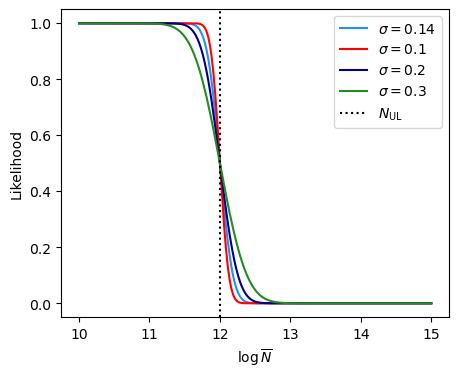

In [25]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(logN_bar_range, np.exp(ll_log_arr)/np.max(np.exp(ll_log_arr)), 
        color='dodgerblue',label=r'$\sigma = 0.14$')

ax.plot(logN_bar_range, np.exp(ll_log_arr_1)/np.max(np.exp(ll_log_arr_1)), 
        label=r'$\sigma = 0.1$', color='red')

ax.plot(logN_bar_range, np.exp(ll_log_arr_2)/np.max(np.exp(ll_log_arr_2)), 
        label=r'$\sigma = 0.2$', color='navy')

ax.plot(logN_bar_range, np.exp(ll_log_arr_3)/np.max(np.exp(ll_log_arr_3)), 
        label=r'$\sigma = 0.3$', color='forestgreen')


plt.axvline(logN_UL, color='black', linestyle=':', label=r'$N_{\mathrm{UL}}$')
plt.xlabel(r'$\log \overline{N}$')
plt.ylabel(r'Likelihood')
plt.legend()

In [26]:
ll_log_arr_2sig = np.array([ll_log(logN_bar, logN_UL, sig_y=1/(2*np.log(10))) for logN_bar in logN_bar_range])

(11.6, 13.4)

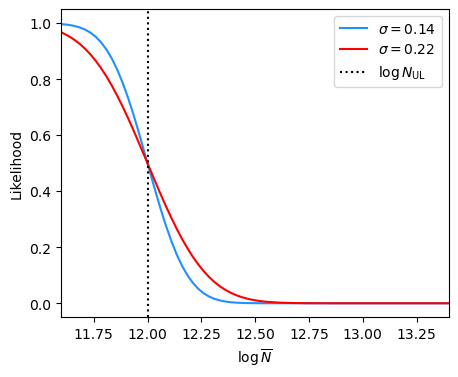

In [27]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(logN_bar_range, np.exp(ll_log_arr)/np.max(np.exp(ll_log_arr)), 
        color='dodgerblue',label=r'$\sigma = 0.14$')

ax.plot(logN_bar_range, np.exp(ll_log_arr_2sig)/np.max(np.exp(ll_log_arr_2sig)), 
        label=r'$\sigma = 0.22$', color='red')


plt.axvline(logN_UL, color='black', linestyle=':', label=r'$\log N_{\mathrm{UL}}$')
plt.xlabel(r'$\log \overline{N}$')
plt.ylabel(r'Likelihood')
plt.legend()
ax.set_xlim(11.6,13.4)